In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline 

C:\Users\potkd\AppData\Local\Temp\ipykernel_1732\2717240389.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Удаление дубликатов в данных

In [2]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [3]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [4]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [5]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [6]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [7]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [9]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [10]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [11]:
data.dropna()

,0,1,2,3


In [12]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-1.212065,NaN,NaN
1,-0.383947,NaN,NaN
2,0.695740,NaN,-0.169442
3,-2.941388,NaN,0.322294
4,0.165296,-0.330100,-1.820578
5,-0.766259,0.125211,-0.647276
6,0.452740,1.844240,-0.850063


In [16]:
df.fillna(0)

,0,1,2
0,-1.212065,0.000000,0.000000
1,-0.383947,0.000000,0.000000
2,0.695740,0.000000,-0.169442
3,-2.941388,0.000000,0.322294
4,0.165296,-0.330100,-1.820578
5,-0.766259,0.125211,-0.647276
6,0.452740,1.844240,-0.850063


In [17]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-1.212065,0.500000,0.000000
1,-0.383947,0.500000,0.000000
2,0.695740,0.500000,-0.169442
3,-2.941388,0.500000,0.322294
4,0.165296,-0.330100,-1.820578
5,-0.766259,0.125211,-0.647276
6,0.452740,1.844240,-0.850063


In [18]:
df.fillna(method="bfill")

C:\Users\potkd\AppData\Local\Temp\ipykernel_1732\3896554658.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill")


,0,1,2
0,-1.212065,-0.330100,-0.169442
1,-0.383947,-0.330100,-0.169442
2,0.695740,-0.330100,-0.169442
3,-2.941388,-0.330100,0.322294
4,0.165296,-0.330100,-1.820578
5,-0.766259,0.125211,-0.647276
6,0.452740,1.844240,-0.850063


In [19]:
df.fillna(method="bfill", limit=2)

C:\Users\potkd\AppData\Local\Temp\ipykernel_1732\695793777.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", limit=2)


,0,1,2
0,-1.212065,NaN,-0.169442
1,-0.383947,NaN,-0.169442
2,0.695740,-0.330100,-0.169442
3,-2.941388,-0.330100,0.322294
4,0.165296,-0.330100,-1.820578
5,-0.766259,0.125211,-0.647276
6,0.452740,1.844240,-0.850063


In [20]:
df.fillna(data.mean())

,0,1,2
0,-1.212065,6.500000,3.000000
1,-0.383947,6.500000,3.000000
2,0.695740,6.500000,-0.169442
3,-2.941388,6.500000,0.322294
4,0.165296,-0.330100,-1.820578
5,-0.766259,0.125211,-0.647276
6,0.452740,1.844240,-0.850063


In [21]:
df.fillna(data.median())

,0,1,2
0,-1.212065,6.500000,3.000000
1,-0.383947,6.500000,3.000000
2,0.695740,6.500000,-0.169442
3,-2.941388,6.500000,0.322294
4,0.165296,-0.330100,-1.820578
5,-0.766259,0.125211,-0.647276
6,0.452740,1.844240,-0.850063


Медиана более устойчива к выбросам

In [22]:
data_all = []
for i in range(1000):
    data = []
    for j in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<Axes: >

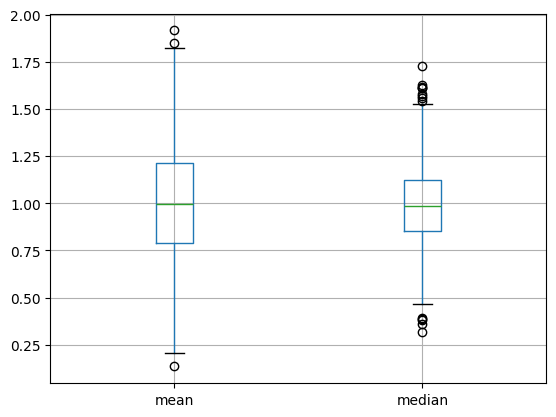

In [23]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [24]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,-1.212065,NaN,NaN,1
1,-0.383947,NaN,NaN,1
2,0.695740,NaN,-0.169442,0
3,-2.941388,NaN,0.322294,0
4,0.165296,-0.330100,-1.820578,0
5,-0.766259,0.125211,-0.647276,0
6,0.452740,1.844240,-0.850063,0


Замена значений

In [25]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [26]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [27]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [28]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [30]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
5,False,False,False,False,True,False
6,False,False,False,False,False,True
7,False,True,False,False,False,False
8,False,False,True,False,False,False
9,False,False,False,True,False,False


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [37]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<Axes: title={'center': '0'}>]], dtype=object)

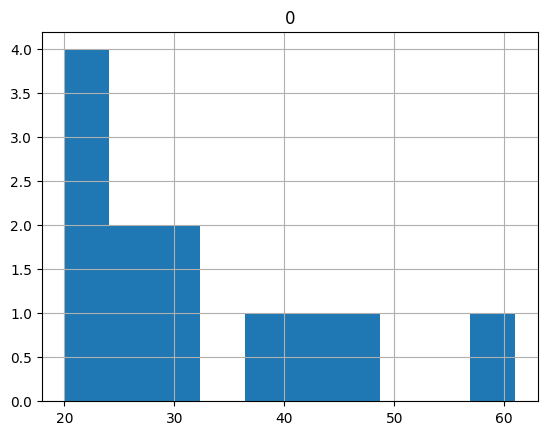

In [38]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [39]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [40]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [42]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\potkd\AppData\Local\Temp\ipykernel_1732\1334197304.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<Axes: ylabel='Density'>

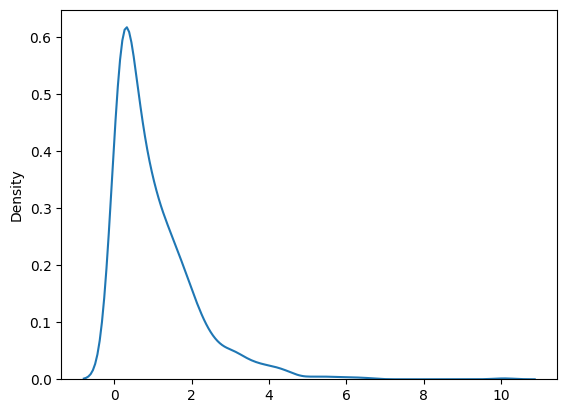

In [43]:
from scipy.stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\potkd\AppData\Local\Temp\ipykernel_1732\1776627611.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<Axes: ylabel='Density'>

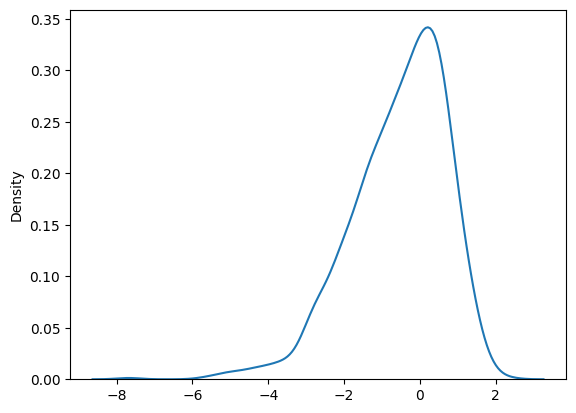

In [44]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\potkd\AppData\Local\Temp\ipykernel_1732\2198520673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<Axes: ylabel='Density'>

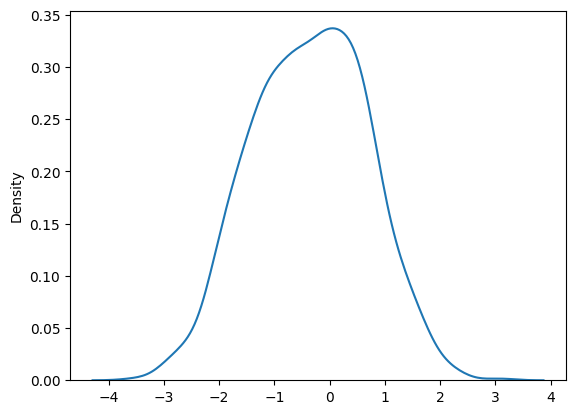

In [45]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [46]:
best_lambda

0.2400953700174531

# Домашнее задание

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [48]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

## Baseline

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [50]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
reg = LinearRegression().fit(train_X, train_y)

In [52]:
reg.score(train_X, train_y)

0.4555406785040048

In [53]:
mean_squared_error(reg.predict(train_X), train_y)

29840.1212508653

In [54]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring='neg_mean_squared_error')

In [55]:
scores

{'fit_time': array([0.02875257, 0.02235985, 0.01398373]),
 'score_time': array([0.00500536, 0.        , 0.01553774]),
 'test_score': array([-29836.8590711 , -29618.75539266, -30344.6536926 ])}

In [56]:
mean_squared_error(reg.predict(test_X), test_y)

31021.024399854483

## Preprocessing

In [63]:
import seaborn as sns

In [65]:
df = df.drop('index', axis=1)

<Axes: >

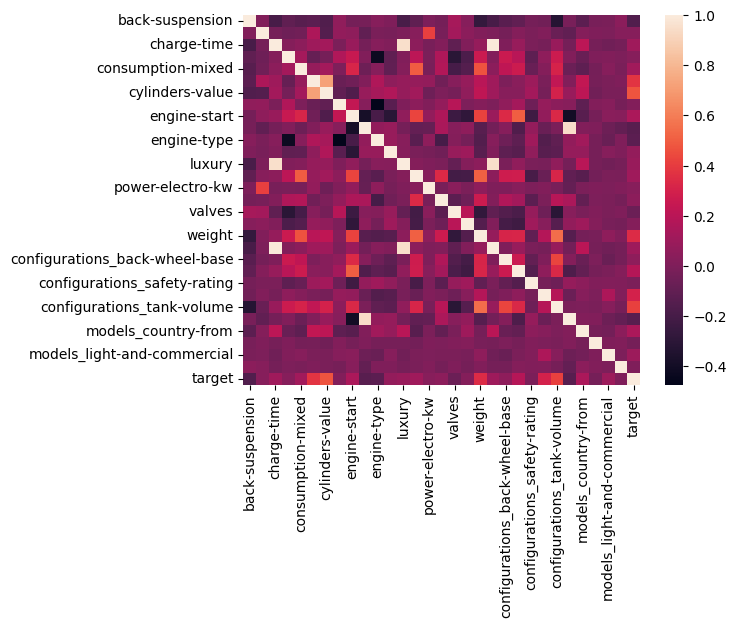

In [72]:
sns.heatmap(df.corr())

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [130]:
lasso_params = {
    'alpha': np.arange(0.052, 0.055, 0.0002)
}

model_lasso = GridSearchCV(
    Lasso(),
    param_grid=lasso_params
).fit(train_X, train_y)

model_lasso.best_params_

c:\Users\potkd\ml_lessons\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.857e+08, tolerance: 1.266e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\potkd\ml_lessons\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.724e+06, tolerance: 1.287e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\potkd\ml_lessons\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

{'alpha': 0.05299999999999999}

In [131]:
model_lasso.score(train_X, train_y), reg.score(train_X, train_y), model_lasso.score(train_X, train_y) > reg.score(train_X, train_y)

(0.4555111072753645, 0.4555406785040048, False)

In [132]:
mean_squared_error(model_lasso.predict(train_X), train_y), mean_squared_error(model_lasso.predict(train_X), train_y) < mean_squared_error(reg.predict(train_X), train_y)

(29841.741957892118, False)

In [133]:
mean_squared_error(model_lasso.predict(test_X), test_y), mean_squared_error(model_lasso.predict(test_X), test_y) < mean_squared_error(reg.predict(test_X), test_y)

(31025.625224276235, False)

In [228]:
ridge_params = {
    'alpha': [200, 230, 250, 265, 270, 275, 290, 300, 500]
}

ridge_params = {
    'alpha': np.arange(1.73, 2, 0.001)
}

model_ridge = GridSearchCV(
    Ridge(),
    param_grid=ridge_params
).fit(train_X, train_y)
model_ridge.best_params_

{'alpha': 1.7499999999999978}

In [ ]:
print(model_ridge.score(train_X, train_y))
print(reg.score(train_X, train_y))
print(model_ridge.score(train_X, test_y) > reg.score(train_X, test_y))

In [229]:
print(model_ridge.score(test_X, test_y))
print(reg.score(test_X, test_y))
print(model_ridge.score(test_X, test_y) > reg.score(test_X, test_y))

0.464613758162979
0.4646243987792351
False


In [230]:
poly = PolynomialFeatures(2)
poly_X = poly.fit_transform(X)

In [231]:
train_poly_X, test_poly_X, train_y, test_y = train_test_split(poly_X, y, test_size=0.33, random_state=42)

In [234]:
reg_for_poly = LinearRegression().fit(train_poly_X, train_y)

In [243]:
print(reg_for_poly.score(train_poly_X, train_y))
print(reg.score(train_X, train_y))
print(reg_for_poly.score(train_poly_X, train_y) > reg.score(train_X, train_y))

0.6851582082401753
0.4555406785040048
True


In [237]:
print(reg_for_poly.score(test_poly_X, test_y))
print(reg.score(test_X, test_y))
print(reg_for_poly.score(test_poly_X, test_y) > reg.score(test_X, test_y))

0.689179814550599
0.4646243987792351
True
